## Submission Deadline

- All submissions must be made before 10:00 PM on Thursday, April 18, 2024.

## Submission Guidelines

**- Format: Submissions are to be made in PDF format via Avenue to Learn, either individually or as a group of up to three members.  
    - GitHub Repository: Your submission must include a link to a public GitHub repository containing the assignment.  
    - Team Submissions: For group submissions, Question 15 must detail each member's contributions. Note that while there are no points allocated to Question 15, failure to provide this information will result in the assignment not being graded.**  

Please view the submission in the public GitHub repository available here: `https://github.com/kyleosung/stats_3da3_a6.git`

## Late Submissions

- 15% will be deducted from assignments each day after the due date (rounding up).

-   Assignments won't be accepted after 48 hours after the due date.

## Assignment Standards

Please ensure your assignment adheres to the following standards for submission:

- **Title Page Requirements:** Each submission must include a title page featuring your group members' names and student numbers. Assignments lacking a title page will not be considered for grading.
- **Individual Work:** While discussing homework problems with peers and group is permitted, the final written submission must be your group work.
- **Formatting Preferences:** The use of LaTeX for document preparation is highly recommended.
- **Font and Spacing:** Submissions must utilize an eleven-point font (Times New Roman or a similar font) with 1.5 line spacing. Ensure margins of at least 1 inch on all sides.
- **Submission Content:** Do not include the assignment questions within your PDF. Instead, clearly mark each response with the corresponding question number. Screenshots are not an acceptable form of submission under any circumstances.
- **Academic Writing:** Ensure that your writing and any references used are appropriate for an undergraduate level of study.
- **Originality Checks:** Be aware that the instructor may use various tools, including those available on the internet, to verify the originality of submitted assignments.
-  Assignment policy on the use of generative AI:
    -  Students are not permitted to use generative AI in this assignment. In alignment with [McMaster academic integrity policy](https://secretariat.mcmaster.ca/app/uploads/Academic-Integrity-Policy-1-1.pdf), it "shall be an offence knowingly to ...  submit academic work for assessment that was purchased or acquired from another source".  This includes work created by generative AI tools. Also state in the policy is the following, "Contract Cheating is the act of"outsourcing of student work to third parties" (Lancaster & Clarke, 2016, p. 639)
    with or without payment." Using Generative AI tools is a form of contract cheating.  Charges of academic dishonesty will be brought forward to the Office of Academic Integrity. 

\newpage

## Chronic Kidney Disease Classification Challenge

### Overview

Engage with the dataset from the [Early Stage of Indians Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease) project, which comprises data on 250 early-stage CKD patients and 150 healthy controls.

For foundational knowledge on the subject, refer to "Predict, diagnose, and treat chronic kidney disease with machine learning: a systematic literature review" by [Sanmarchi et al., (2023)](https://link.springer.com/article/10.1007/s40620-023-01573-4).

### Objectives

Analyze the dataset using two classification algorithms, focusing on exploratory data analysis, feature selection, engineering, and especially on handling missing values and outliers. Summarize your findings with insightful conclusions.

**Classifier Requirement:** Ensure at least one of the classifiers is interpretable, to facilitate in-depth analysis and inference.

### Guidelines

- **Teamwork:** Group submissions should compile the workflow (Python codes and interpretations) into a single PDF, including a GitHub repository link. The contributions listed should reflect the GitHub activity.
- **Content:** Address the following questions in your submission, offering detailed insights and conclusions from your analysis.

### Assignment Questions

1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.
2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.
3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).
4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).
5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.
6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.
7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).
8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.
9. **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.
10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.
11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).
12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).
13. **Interpretable Classifier Insight:** After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).
14. **[Bonus]** Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).
15. **Team Contributions:** Document each team member's specific contributions related to the questions above.
16. **Link** to the public GitHub repository.

### Notes

- This assignment encourages you to apply sophisticated machine learning methods to a vital healthcare challenge, promoting the development of critical analytical skills, teamwork, and practical problem-solving abilities in the context of chronic kidney disease diagnosis and treatment.
- Students can choose one classifer not covered in the lectures.

# Section 1: Classification Problem Identification

**Define and describe a classification problem based on the dataset.**

Worked on by: Kyle

<span style='color:red'>Note from Ahmed</span>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

np.random.seed(0)

<span style='color:red'>Ahmed note: Requires installation of dependencies, may want to include the file in the repo and load it locally instead, e.g.,</span>

```python
ckd = pd.read_csv('ckd.csv')
cld_predictors = ckd.loc[:, ckd.columns[:-1]]
cld_response = ckd.loc[:, [ckd.columns[-1]]]

# Could use this if skeptical of numeric dtypes and nullability concerns
# fhs_fd = fhs.convert_dtypes()
# Succinct but non-explicit, so there's a tradeoff
```

In [3]:
## Load in the dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets

In [4]:
# metadata 
chronic_kidney_disease.metadata

{'uci_id': 336,
 'name': 'Chronic Kidney Disease',
 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease',
 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv',
 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.',
 'area': 'Other',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 400,
 'num_features': 24,
 'feature_types': ['Real'],
 'demographics': ['Age'],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 2015,
 'last_updated': 'Mon Mar 04 2024',
 'dataset_doi': '10.24432/C5G020',
 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'],
 'intro_paper': None,
 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood p

In [5]:
# variable information 
chronic_kidney_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,year,yes
1,bp,Feature,Integer,None,blood pressure,mm/Hg,yes
2,sg,Feature,Categorical,None,specific gravity,None,yes
3,al,Feature,Categorical,None,albumin,None,yes
4,su,Feature,Categorical,None,sugar,None,yes
5,rbc,Feature,Binary,None,red blood cells,None,yes
6,pc,Feature,Binary,None,pus cell,None,yes
7,pcc,Feature,Binary,None,pus cell clumps,None,yes
8,ba,Feature,Binary,None,bacteria,None,yes
9,bgr,Feature,Integer,None,blood glucose random,mgs/dl,yes


We observe that by the variables dataframe, we have 24 predictor variables and a target variable (class). By the metadata, we identify the task at hand: to identify the class, whether the patient has chronic kidney disease or not, based on the predictor variables.

In our exploratory analysis, we observe the following:
- There are a few categorical variables, `sg`: specific gravity, `al`: albumin, `su`: sugar. We will have to preprocess these, perhaps with one-hot-encoding, before we can apply machine learning algorithms.
- There are missing values from every single predictor variable. These missing values may have to be imputed, or rows may have to be removed. However, given that there are only 400 observations in the dataset, we can only remove these sparingly.

In [6]:
print(f"sg Specific Gravity Unique Values: \n{X['sg'].unique()}\n")
print(f"al Albumin Unique Values: \n{X['al'].unique()}\n")
print(f"su Sugar Unique Values: \n{X['su'].unique()}")

sg Specific Gravity Unique Values: 
[1.02  1.01  1.005 1.015   nan 1.025]

al Albumin Unique Values: 
[ 1.  4.  2.  3.  0. nan  5.]

su Sugar Unique Values: 
[ 0.  3.  4.  1. nan  2.  5.]


In [7]:
# view the first couple rows for the first fifteen columns
X.iloc[:3, :15]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6


In [8]:
# view the first couple rows for the last columns
X.iloc[:3, 15:]

,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,38.0,6000.0,NaN,no,no,no,good,no,no
2,31.0,7500.0,NaN,no,yes,no,poor,no,yes


In [9]:
X.shape

(400, 24)

# Section 2: Variable Transformation

**Implement any transformations chosen or justify the absence of such modifications.**

Worked on by: Kyle

<span style='color:red'>Note from Ahmed</span>

We observe that we may turn binary variables into one-hot-encoded True/False variables.

In [10]:
chronic_kidney_disease.variables[chronic_kidney_disease.variables['type'] == 'Binary']

,name,role,type,demographic,description,units,missing_values
5,rbc,Feature,Binary,None,red blood cells,None,yes
6,pc,Feature,Binary,None,pus cell,None,yes
7,pcc,Feature,Binary,None,pus cell clumps,None,yes
8,ba,Feature,Binary,None,bacteria,None,yes
18,htn,Feature,Binary,None,hypertension,None,yes
19,dm,Feature,Binary,None,diabetes mellitus,None,yes
20,cad,Feature,Binary,None,coronary artery disease,None,yes
21,appet,Feature,Binary,None,appetite,None,yes
22,pe,Feature,Binary,None,pedal edema,None,yes
23,ane,Feature,Binary,None,anemia,None,yes


In [11]:
binary_variables = chronic_kidney_disease.variables[chronic_kidney_disease.variables['type'] == 'Binary']['name'].unique()[:-1] ## REMOVE CLASS PREDICTOR
binary_variables

array(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'],
      dtype=object)

In [12]:
for var in binary_variables:
    print(f'{var} Values: {X[var].unique()}')


rbc Values: [nan 'normal' 'abnormal']
pc Values: ['normal' 'abnormal' nan]
pcc Values: ['notpresent' 'present' nan]
ba Values: ['notpresent' 'present' nan]
htn Values: ['yes' 'no' nan]
dm Values: ['yes' 'no' '\tno' nan]
cad Values: ['no' 'yes' nan]
appet Values: ['good' 'poor' nan]
pe Values: ['no' 'yes' nan]
ane Values: ['no' 'yes' nan]


<hr style="border:1px solid red">
<span style='color:red'>Ahmed note: This categorical variable handling is a bit more succinct, and achieves the same result</span>

In [13]:
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# `dm` column typo fix
X.loc[X['dm'] == '\tno', 'dm'] = 'no'

X_alt = X.astype({col: 'category' for col in cat_cols})

for col in cat_cols:
    X_alt[col] = X_alt[col].cat.codes

`-1` for `NaN`s, `0` and `1` in alphabetical order, i.e., (`0`, `1`) for (`abnormal`, `normal`), (`notpresent`, `present`), (`no`, `yes`), and (`good`, `poor`).

In [14]:
for var in cat_cols:
    print(var, set(zip(X_alt[var], X[var])))

rbc {(-1, nan), (1, 'normal'), (0, 'abnormal')}
pc {(-1, nan), (1, 'normal'), (0, 'abnormal')}
pcc {(-1, nan), (0, 'notpresent'), (1, 'present')}
ba {(-1, nan), (0, 'notpresent'), (1, 'present')}
htn {(-1, nan), (0, 'no'), (1, 'yes')}
dm {(-1, nan), (0, 'no'), (1, 'yes')}
cad {(-1, nan), (0, 'no'), (1, 'yes')}
appet {(-1, nan), (0, 'good'), (1, 'poor')}
pe {(-1, nan), (0, 'no'), (1, 'yes')}
ane {(-1, nan), (0, 'no'), (1, 'yes')}


<hr style="border:1px solid red">

In [15]:
%%capture
# suppress warnings

X['rbc'] = X['rbc'].replace({'abnormal': 1, 'normal': 0})
X['pc'] = X['pc'].replace({'abnormal': 1, 'normal': 0})
X['pcc'] = X['pcc'].replace({'present': 1, 'notpresent': 0})
X['ba'] = X['ba'].replace({'present': 1, 'notpresent': 0})
X['htn'] = X['htn'].replace({'yes': 1, 'no': 0})
X['dm'] = X['dm'].replace({'yes': 1, 'no': 0})
X['cad'] = X['cad'].replace({'yes': 1, 'no': 0})
X['appet'] = X['appet'].replace({'good': 1, 'poor': 0})
X['pe'] = X['pe'].replace({'yes': 1, 'no': 0})
X['ane'] = X['ane'].replace({'yes': 1, 'no': 0})

X = X.replace({'\tno': 0}, regex=True)

X = X.rename(columns={
    'rbc': 'rbc_is_abnormal',
    'pc': 'pc_is_abnormal',
    'pcc': 'pcc_present',
    'ba': 'ba_present',
    'appet': 'good_appet', 
})

In [16]:
# view the first couple rows for the first fifteen columns
X.iloc[:5, :15]

,age,bp,sg,al,su,rbc_is_abnormal,pc_is_abnormal,pcc_present,ba_present,bgr,bu,sc,sod,pot,hemo
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6


In [17]:
# view the first couple rows for the last columns
X.iloc[:5, 15:]

,pcv,wbcc,rbcc,htn,dm,cad,good_appet,pe,ane
0,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0
1,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0
2,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0
3,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0
4,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
for col in X.columns:
    print(f"{col} Values: {X[col].unique()}")

age Values: [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
bp Values: [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
sg Values: [1.02  1.01  1.005 1.015   nan 1.025]
al Values: [ 1.  4.  2.  3.  0. nan  5.]
su Values: [ 0.  3.  4.  1. nan  2.  5.]
rbc_is_abnormal Values: [nan  0.  1.]
pc_is_abnormal Values: [ 0.  1. nan]
pcc_present Values: [ 0.  1. nan]
ba_present Values: [ 0.  1. nan]
bgr Values: [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 1

In [19]:
%%capture
y_r = y.replace({'ckd': 1, 'notckd': 0})
y_r = y_r.replace({r'ckd\t': 1}, regex=True)

# print(y_r)
# print(y_r['class'].unique())

After performing one-hot encoding on the binary variables, we also observe that we should perform scaling on the continuous variables.

In [20]:
chronic_kidney_disease.variables[chronic_kidney_disease.variables['type'] == 'Continuous']['name'].unique()

array(['sc', 'pot', 'hemo', 'rbcc'], dtype=object)

In [21]:
continuous_variables = chronic_kidney_disease.variables[chronic_kidney_disease.variables['type'] == 'Continuous']['name'].unique()

X[continuous_variables].head()

,sc,pot,hemo,rbcc
0,1.2,NaN,15.4,5.2
1,0.8,NaN,11.3,NaN
2,1.8,NaN,9.6,NaN
3,3.8,2.5,11.2,3.9
4,1.4,NaN,11.6,4.6


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[continuous_variables] = scaler.fit_transform(X[continuous_variables])

X[continuous_variables].head()

,sc,pot,hemo,rbcc
0,-0.326574,NaN,0.988022,0.481295
1,-0.396338,NaN,-0.421688,NaN
2,-0.221928,NaN,-1.006202,NaN
3,0.126891,-0.667102,-0.456071,-0.788961
4,-0.291692,NaN,-0.318538,-0.104977


Possible: Use `pd.DataFrame.get_dummies()`.

# Section 3: Dataset Overview

**Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).**

Worked on by: Kyle

<span style='color:red'>Note from Ahmed</span>

In [23]:
chronic_kidney_disease.data.features.shape

(400, 24)

In [24]:
chronic_kidney_disease.data.targets.shape

(400, 1)

In [25]:
chronic_kidney_disease.data.features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    float64
 6   pc      335 non-null    float64
 7   pcc     396 non-null    float64
 8   ba      396 non-null    float64
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    float64
 19  dm      398 non-null    float64
 20  cad     398 non-null    float64
 21  appet   399 non-null    float64
 22  pe

In [26]:
chronic_kidney_disease.data.targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   400 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [27]:
chronic_kidney_disease.data.features.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,...,348.000000,329.000000,294.000000,269.000000,398.000000,398.000000,398.000000,399.000000,399.000000,399.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,148.036517,...,12.526437,38.884498,8406.122449,4.707435,0.369347,0.344221,0.085427,0.794486,0.190476,0.150376
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,...,2.912587,8.990105,2944.474190,1.025323,0.483235,0.475712,0.279868,0.404584,0.393170,0.357888
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,...,10.300000,32.000000,6500.000000,3.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,...,12.650000,40.000000,8000.000000,4.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,...,15.000000,45.000000,9800.000000,5.400000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,17.800000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
chronic_kidney_disease.data.targets.describe

<bound method NDFrame.describe of       class
0       ckd
1       ckd
2       ckd
3       ckd
4       ckd
..      ...
395  notckd
396  notckd
397  notckd
398  notckd
399  notckd

[400 rows x 1 columns]>

<span style='color:red'>Ahmed note: Need to adjust dtypes (and impute here?).</span>

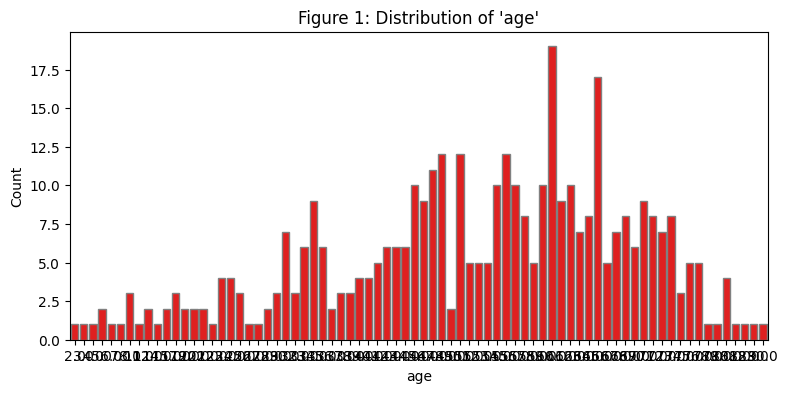

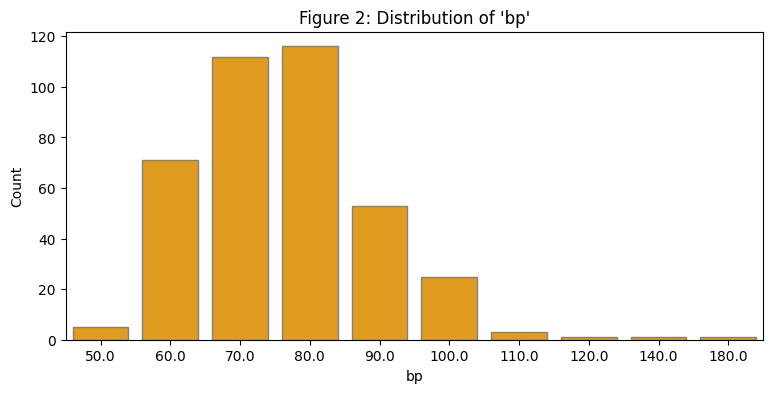

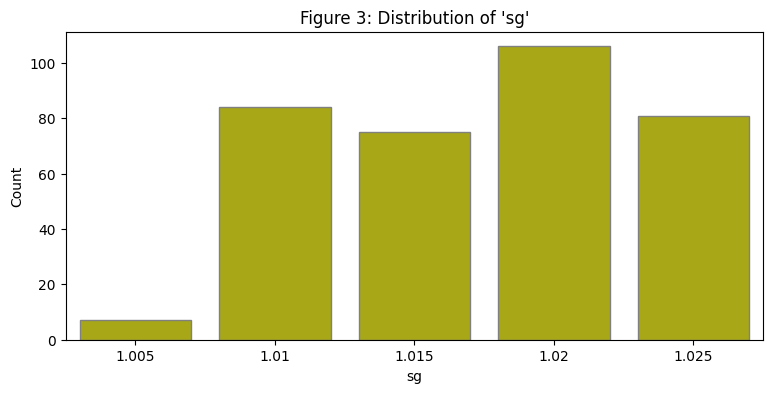

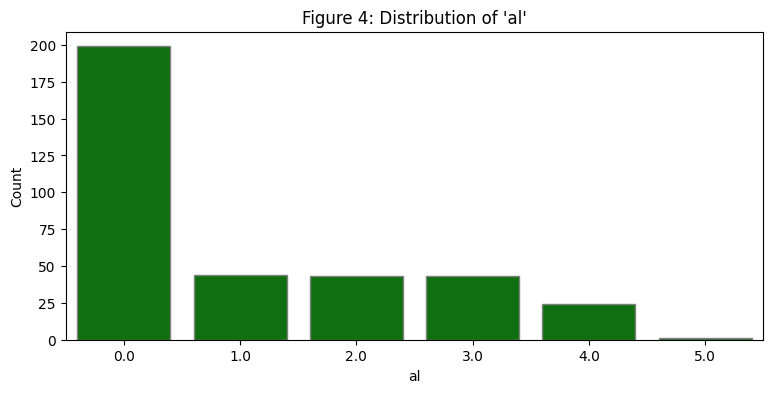

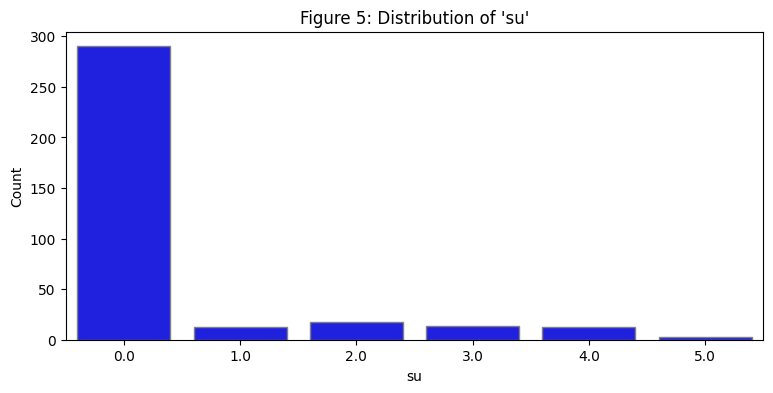

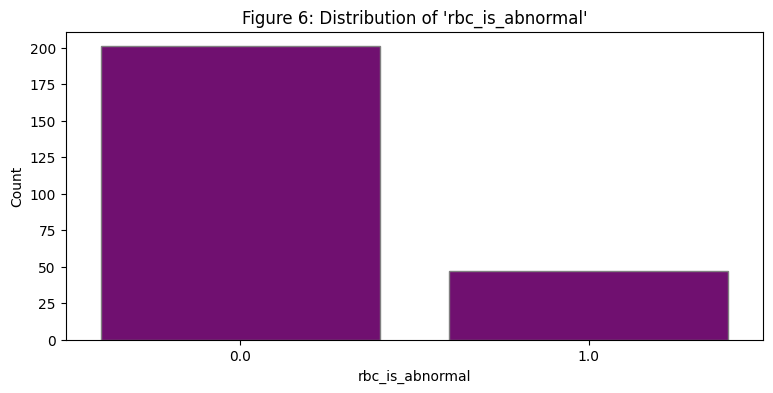

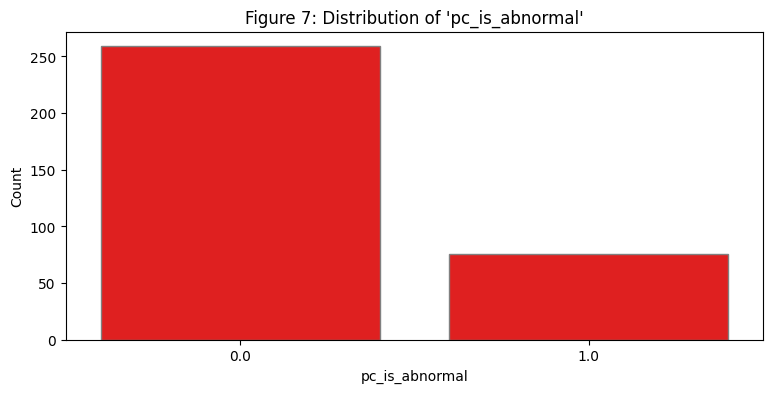

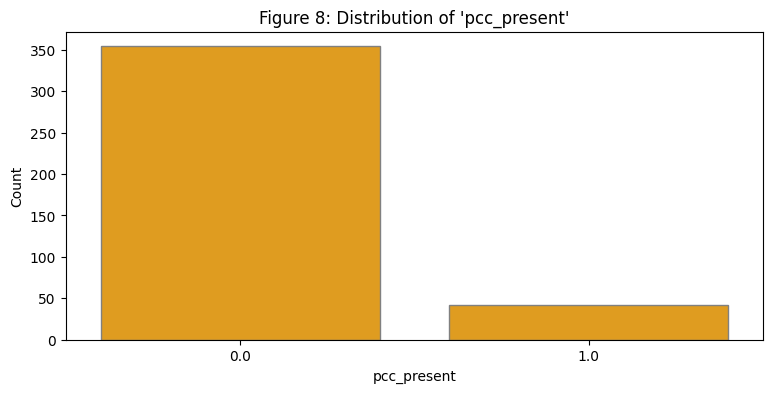

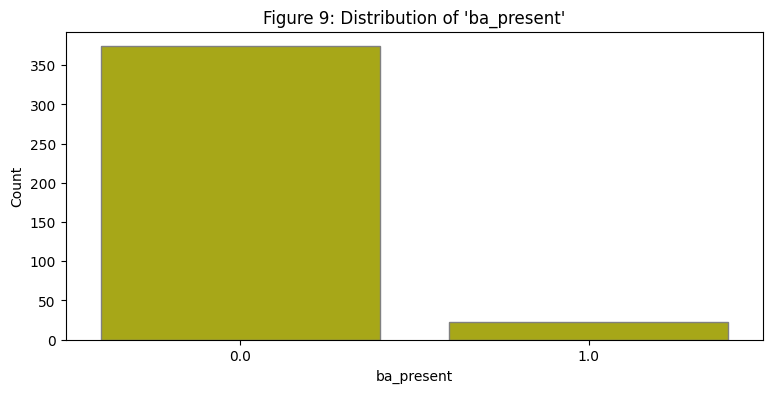

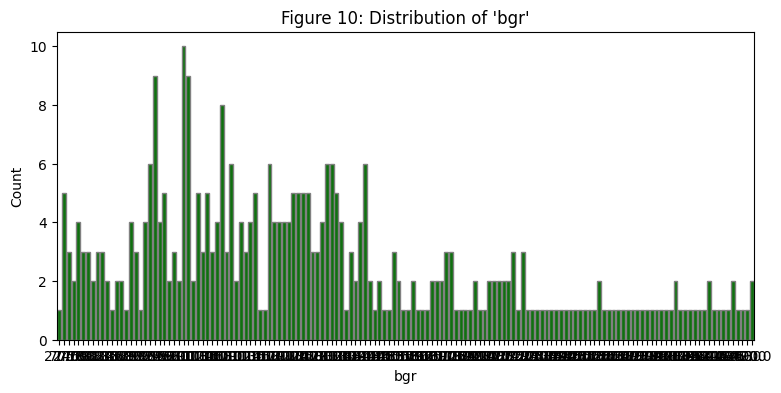

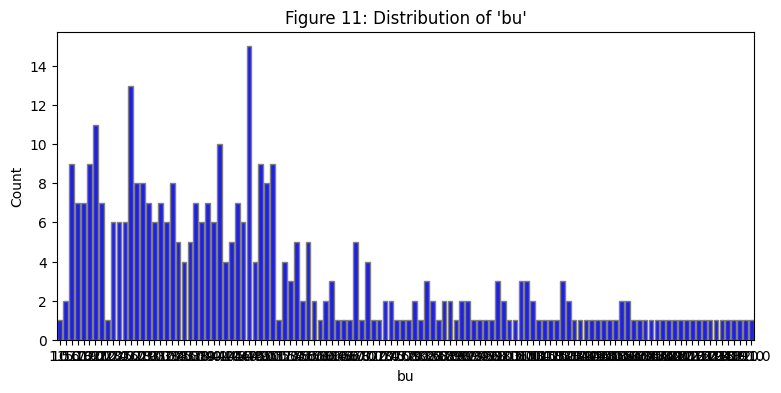

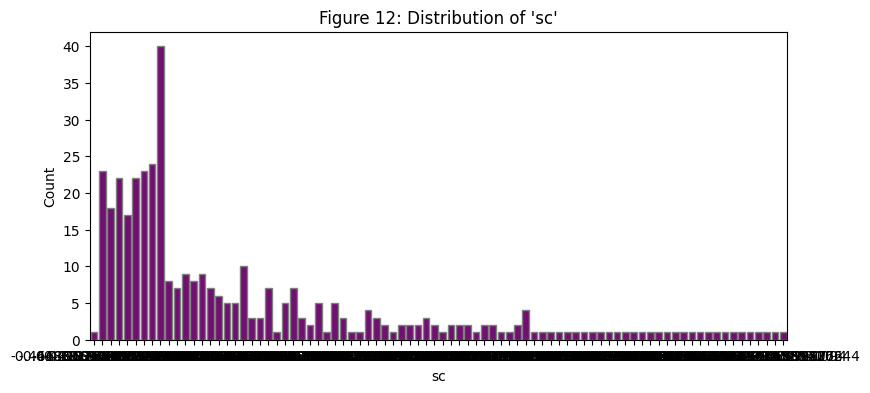

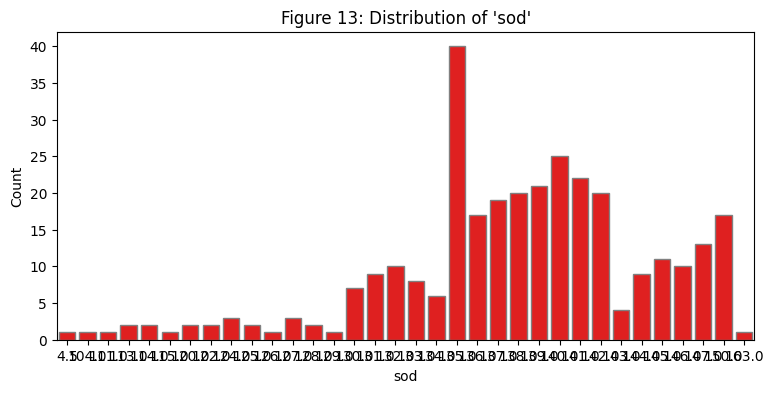

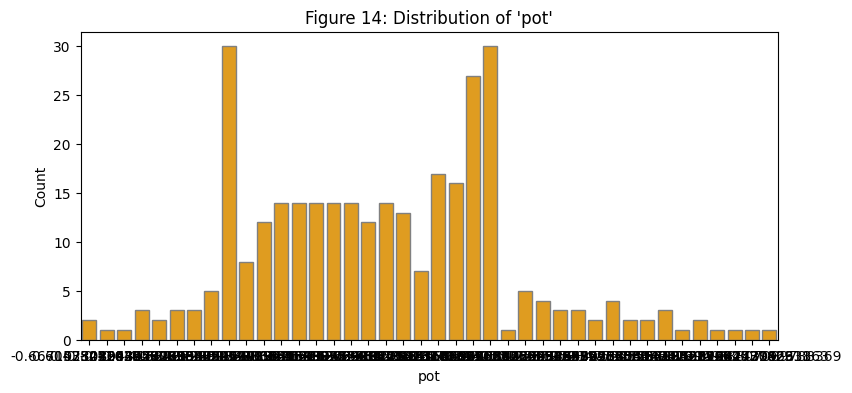

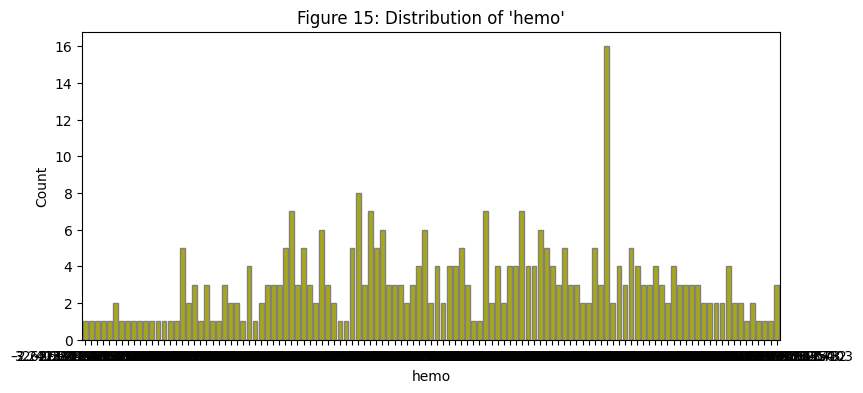

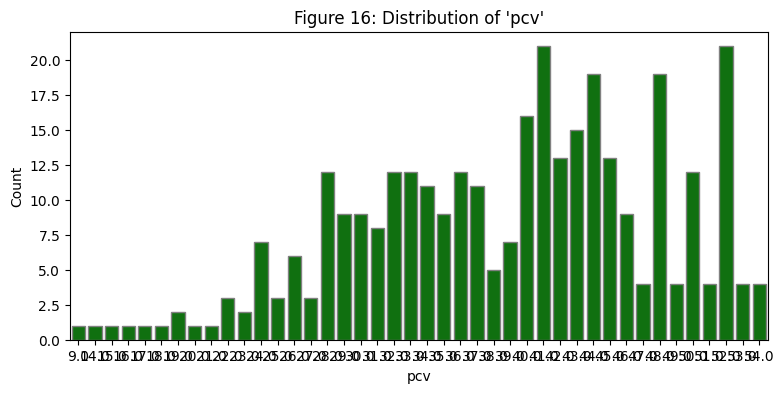

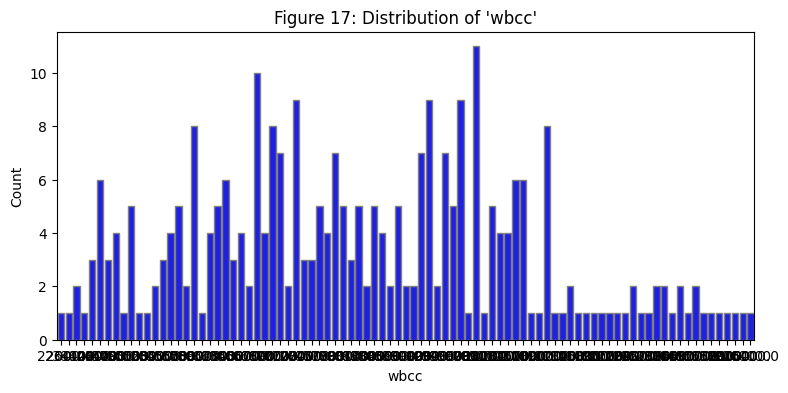

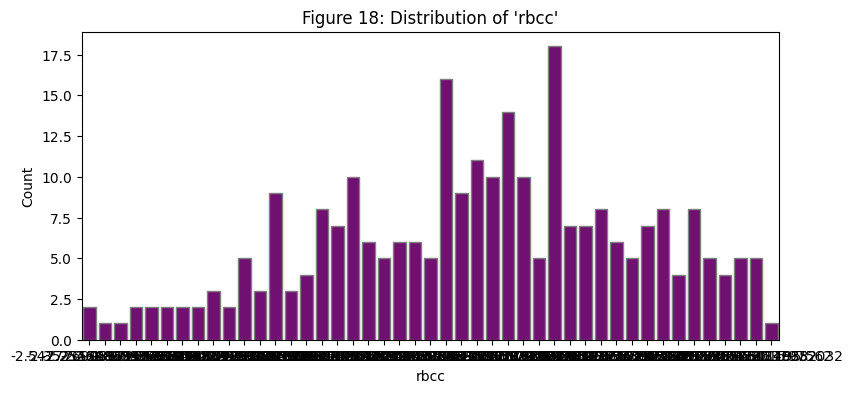

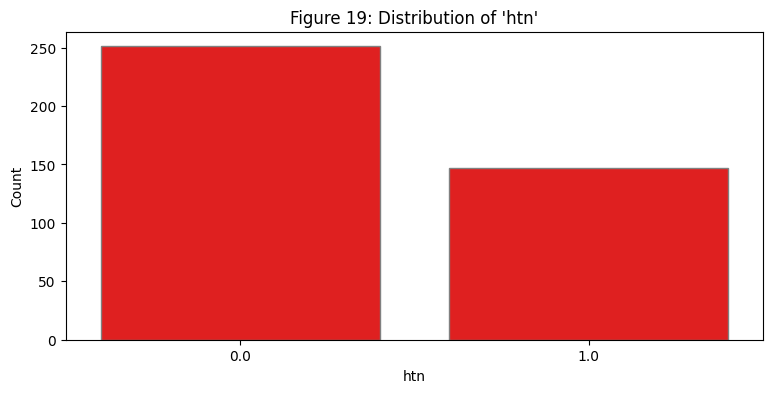

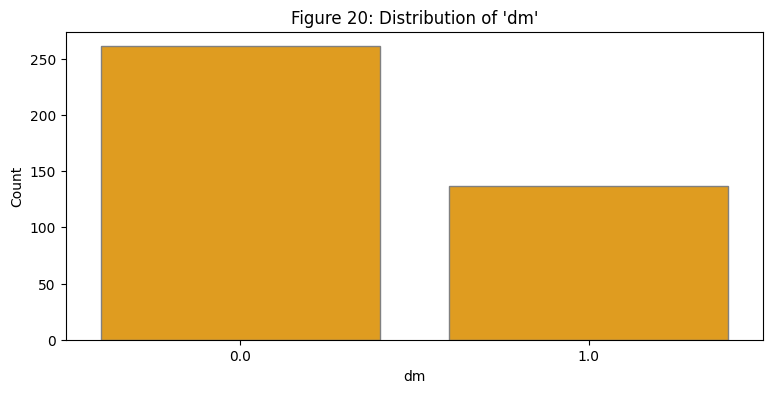

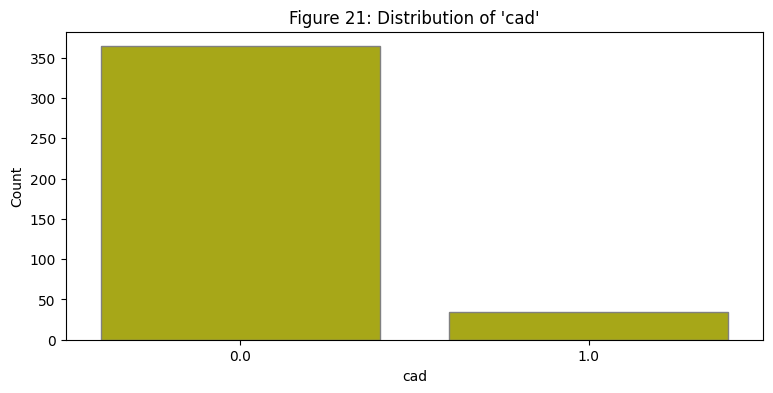

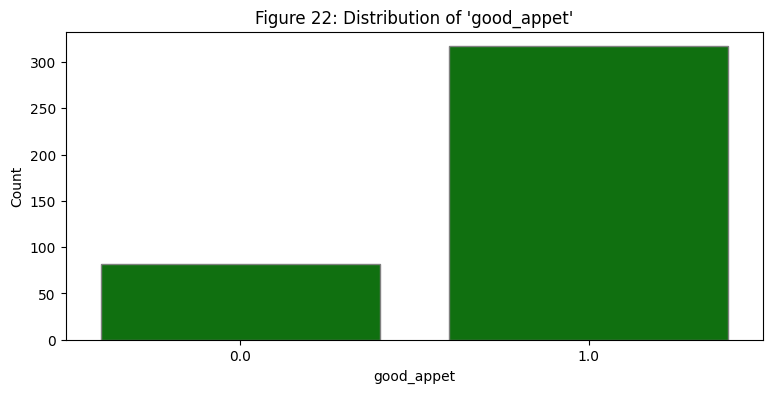

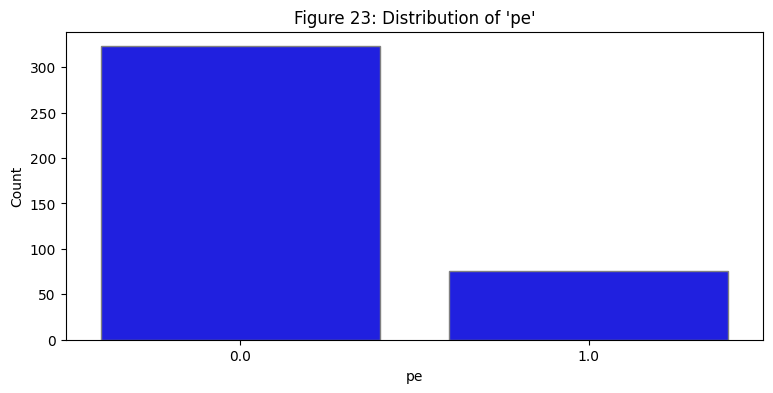

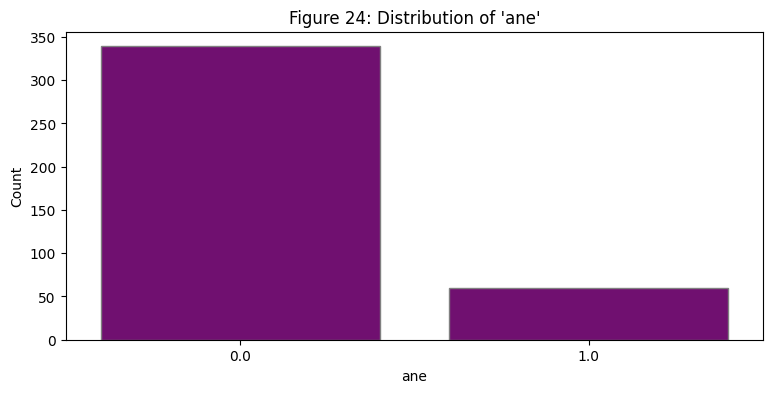

In [29]:
colors = ['r', 'orange', 'y', 'g', 'b', 'purple']

for i, var in enumerate(X.columns): # don't include predictor variable
    plt.figure(figsize=(9, 4))
    sns.countplot(
        data = X,
        x = var,
        color = colors[i % 6],
        edgecolor = 'gray',
    )


    plt.title(f"Figure {i+1}: Distribution of '{var}'")
    plt.xlabel(f"{var}")
    plt.ylabel(f"Count")
    plt.savefig(f'figures/fig{i+1}_dist-{var}')
    plt.show()

# Section 4: Association Between Variables

**Analyze variable relationships and their implications for feature selection or extraction (at least three statements).**

Worked on by: Taylor, Kyle

<span style='color:red'>Note from Ahmed</span>

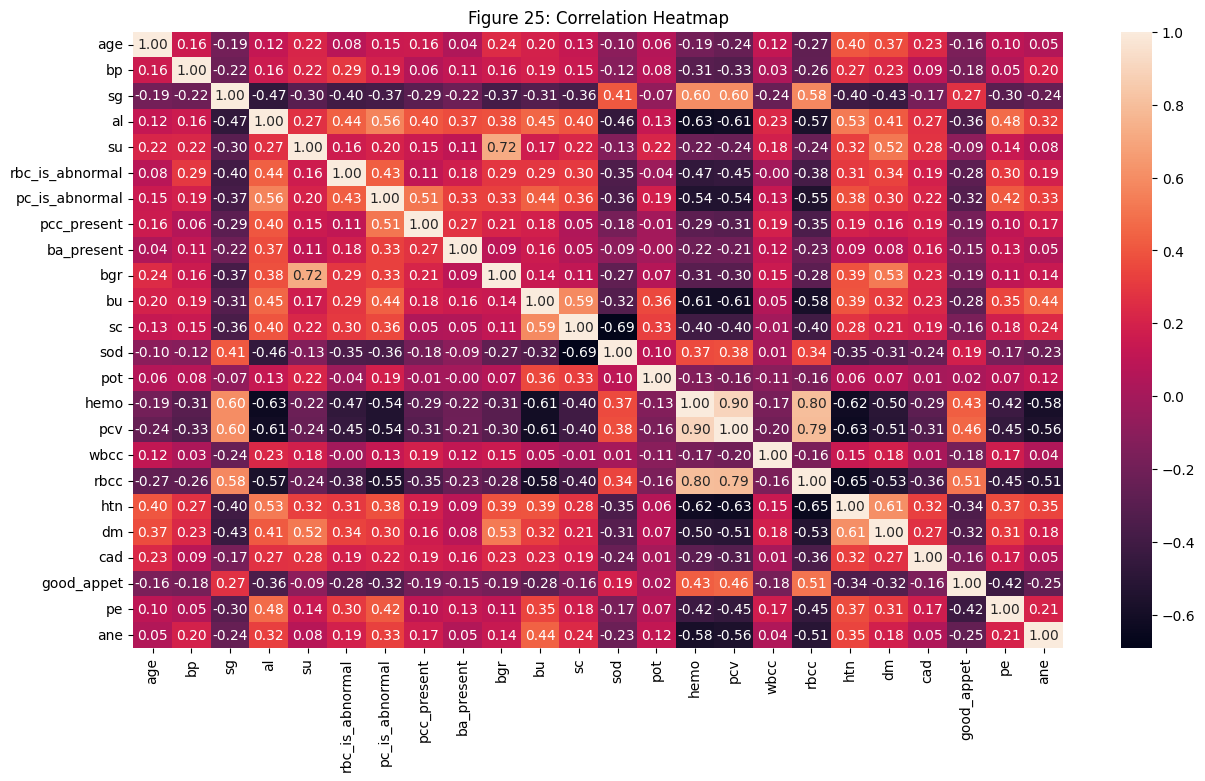

In [30]:
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(), annot = True, fmt=".2f")
plt.title('Figure 25: Correlation Heatmap')
plt.savefig('figures/fig25_corr-heatmap')
plt.show()

<span style='color:red'>Ahmed note: Missing written response</span>

# Section 5: Missing Value Analysis and Handling

**Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.**

Worked on by: Kyle

<span style='color:red'>Note from Ahmed</span>

In [31]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

Before deciding what to do with missing values we should determine what causes the values to be missing. If a feature is missing at random, we may safely remove the row. If the feature is missing for statistical reasons, we must not remove the row and take this info account.

We use Little's MCAR test which tests the null hypothesis of the data being missing at random.

In [32]:
from pyampute.exploration.mcar_statistical_tests import MCARTest
from scipy.stats import chi2

mt = MCARTest(method = 'little') # Null Hypothesis: Data is MCAR
p_value = mt.little_mcar_test(X)
alpha = 0.05

if p_value < alpha:
    print(f'Reject null hypothesis: Data is not MCAR (p-value = {p_value:.4f})')
else:
    print(f'Do not reject null hypothesis: Data is MCAR (p-value = {p_value:.4f})')

Reject null hypothesis: Data is not MCAR (p-value = 0.0000)


We observe that by the MCAR test, the data appears to not be missing at random. Thus, we must account for this by imputing any missing values.

In [33]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
X_knn_imputed = knn_imputer.fit_transform(X)
X_knn_imputed

array([[48.   , 80.   ,  1.02 , ...,  1.   ,  0.   ,  0.   ],
       [ 7.   , 50.   ,  1.02 , ...,  1.   ,  0.   ,  0.   ],
       [62.   , 80.   ,  1.01 , ...,  0.   ,  0.   ,  1.   ],
       ...,
       [12.   , 80.   ,  1.02 , ...,  1.   ,  0.   ,  0.   ],
       [17.   , 60.   ,  1.025, ...,  1.   ,  0.   ,  0.   ],
       [58.   , 80.   ,  1.025, ...,  1.   ,  0.   ,  0.   ]])

In [34]:
from sklearn.impute import SimpleImputer

X_mean_imputed = SimpleImputer(missing_values = np.nan, strategy = 'mean').fit_transform(X)
X_medi_imputed = SimpleImputer(missing_values = np.nan, strategy = 'median').fit_transform(X)
X_mode_imputed = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent').fit_transform(X)

In [35]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

X_iter_imputed = IterativeImputer(random_state=0).fit_transform(X)

In [36]:
X_aver_imputed = (X_knn_imputed + X_mean_imputed + X_medi_imputed + X_mode_imputed + X_iter_imputed) / 5
X_aver_imputed

array([[48.   , 80.   ,  1.02 , ...,  1.   ,  0.   ,  0.   ],
       [ 7.   , 50.   ,  1.02 , ...,  1.   ,  0.   ,  0.   ],
       [62.   , 80.   ,  1.01 , ...,  0.   ,  0.   ,  1.   ],
       ...,
       [12.   , 80.   ,  1.02 , ...,  1.   ,  0.   ,  0.   ],
       [17.   , 60.   ,  1.025, ...,  1.   ,  0.   ,  0.   ],
       [58.   , 80.   ,  1.025, ...,  1.   ,  0.   ,  0.   ]])

<span style='color:red'>Ahmed note: Could throw in hard-impute (PCA imputation) as well? Could compare the imputation values across different methods and manually choose one that makes sense - doesn't need to be a democracy :^) e.g., tailed-distribution variable gets median imputation, whereas symmetric, unimodal variable gets mean</span>

In [37]:
np.sum(X_aver_imputed - X_knn_imputed) / (400 * 24)

0.2071863610409797

In [38]:
np.count_nonzero(np.isnan(X_knn_imputed))

0

We have imputed all missing values.

Let's choose one of our data imputations.


In [39]:
# Temp

X_filled = X_aver_imputed ## use an average of all imputation methods

An alternative approach is to use a classfication method which allows for missing values such as random forest classification.

# Section 6: Outlier Analysis

**Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.**

Worked on by: Ahmed

Of the featureset, `age`, `bp`, `bgr`, `bu`, `sc`, `sod`, `pot`, `hemo`, `pcv`, `wbcc`, and `rbcc` are numeric, so will be investigated for (marginal/univariate) outliers. `bp` has sufficiently few unique values and passes the eye test, so can be assumed to have no known outliers.

*Notes*:
- Use [Isolation Forest](https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py)s to quantitatively identify "normally-distributed" (potentially slightly deformed) features' outliers. *Appears to be geared to symmetric & ?unimodal? distrbutions here too*. Does seem to be better for high-dimensional datasets, so perhaps try multivariate outlier detection.
- User [Local Outlier Factor](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html#sphx-glr-auto-examples-neighbors-plot-lof-outlier-detection-py) to use a KNN-esque method for outlier detection through regional density comparisons. *Be cautious not to introduce leakage here*, only use training data when fitting.
- Use [Median Absolute Deviance](https://www.frontiersin.org/journals/psychology/articles/10.3389/fpsyg.2021.819854/full#:~:text=view_only%3D5cd1c734b392442d9633d3b7414c0914\).-,Median%20Absolute%20Deviation,-The%20method%20of) because it's robust to outliers, and we have quite a few skewed distributions


- Extra readings for logistic-regression-based outlier detection, i.e., binary classification and interpretable outlier detection so useful for us :^) : ["Detection of Outliers and Influential Observations in Binary Logistic Regression: An Empirical Study"](https://scialert.net/fulltext/?doi=jas.2011.26.35), ["Logistic regression and the Linear Probability Model: outliers"](http://teaching.sociology.ul.ie:3838/logitinfl/), and ["Outlier Detection in Logistic Regression: A Quest for Reliable Knowledge from Predictive Modeling and Classification"](https://pdfs.semanticscholar.org/6712/7a1c5131218518225822067da0370bfc578f.pdf).
    - Can "supercharge" logistic regression with interaction terms, categorical predictors, regularization, and non-linear bases.

- Should we have extra time, can look into jack-knifing for outlier detection in a classification context.

### MCD (Minimum Covariance Determinant) estimator & Mahalnobis distance

Relevant resources:
- [MCD (Minimum Covariance Determinant) estimator & Mahalnobis distance](https://scikit-learn.org/stable/auto_examples/covariance/plot_mahalanobis_distances.html#sphx-glr-auto-examples-covariance-plot-mahalanobis-distances-py).
- [Outlier Identification Using Mahalanobis Distance](https://www.cfholbert.com/blog/outlier_mahalanobis_distance/).

In [84]:
from sklearn.covariance import MinCovDet
from scipy.stats import chi2

X_cov = MinCovDet().fit(X_filled)

# X_mahalanobis_sqrd = X_cov.mahalanobis(X_filled - np.mean(X_filled, 0))

# 99.9% p-value cutoff
cutoff = chi2.ppf(0.999, X_filled.shape[1])
X_pvals = chi2.sf(X_cov.dist_, X_filled.shape[1])

X_outliers = X_filled[X_cov.dist_ > cutoff]

In [89]:
print(f'Cutoff Mahalanobis distance: {cutoff:.3f}',
      f'Number of outlier observations: {X_outliers.shape[0]}',
      sep='\n')

Cutoff Mahalanobis distance: 51.179
Number of outlier observations: 193


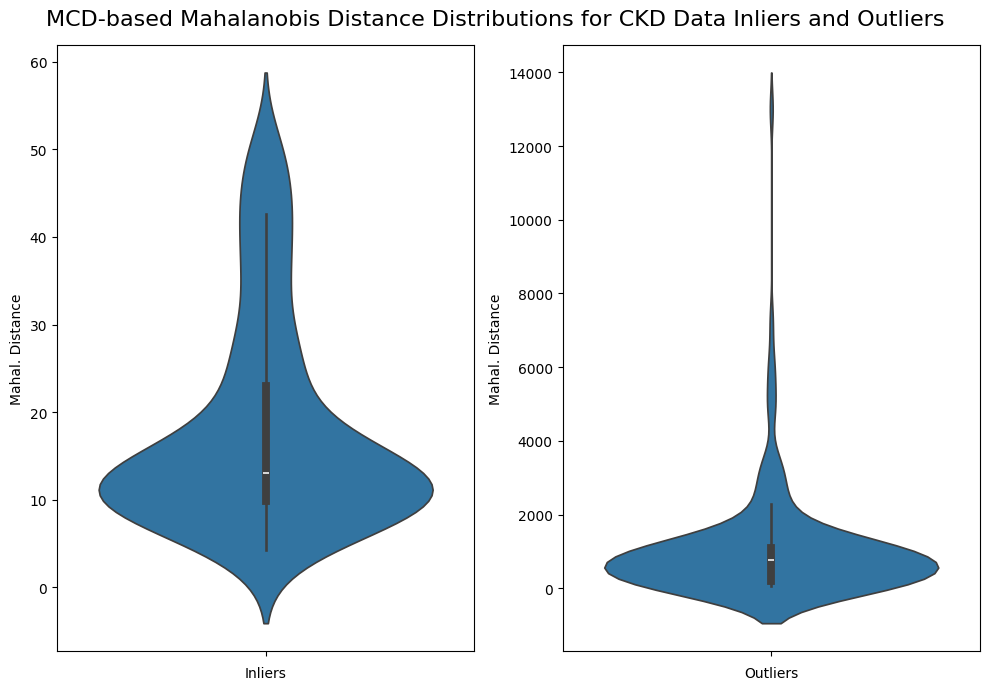

In [126]:
#fig-align: center

fig, ax = plt.subplots(1, 2, figsize=(10, 7))

sns.violinplot(X_cov.dist_[X_cov.dist_ <= cutoff], ax=ax[0])
sns.violinplot(X_cov.dist_[X_cov.dist_ > cutoff], ax=ax[1])
ax[0].set(xlabel='Inliers',
          ylabel='Mahal. Distance')
ax[1].set(xlabel='Outliers',
          ylabel='Mahal. Distance'  )
fig.suptitle("MCD-based Mahalanobis Distance Distributions for CKD Data Inliers and Outliers", fontsize=16)

plt.tight_layout()

While the Mahalanobis distance obtained using MCD *can* be used for outlier detection, it suggests omitting 193 (of 400) observations even with a 99.9% $\chi^2$ p-value as the outlier threshold, so it will not be acted on.

# Section 7: Subgroup Analysis

**Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).**

Worked on by: Kyle

For subgroup analysis, an easy choice is to use K-Means clustering. We will do this first for multiple values of K, and then attempt to visualize it.

However, in order to be able to visualize the clusters, we must first reduce the number of features as it will be impossible to visualize the current data in twenty-four dimensional space!

Thus, our workflow for Section 7 is as follows: determine the optimal value of K, imploy PCA to reduce to two principal components, then, we use our earlier described K-Means clustering.

In [444]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

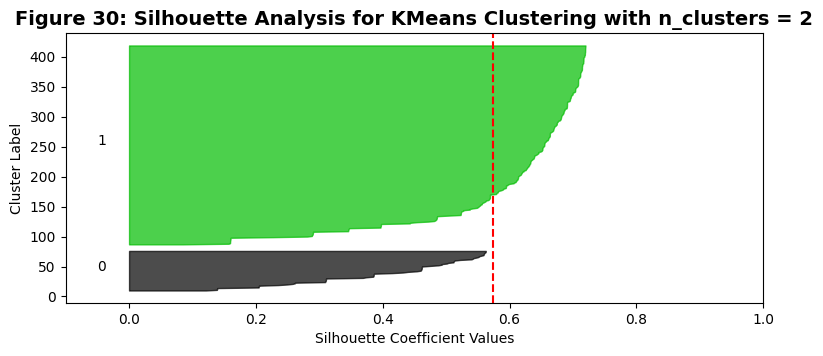

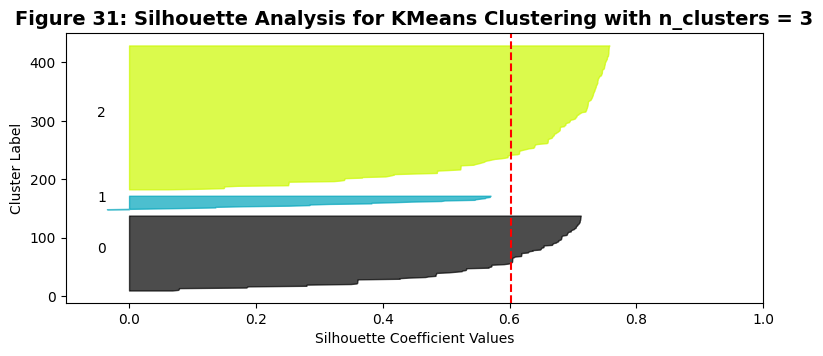

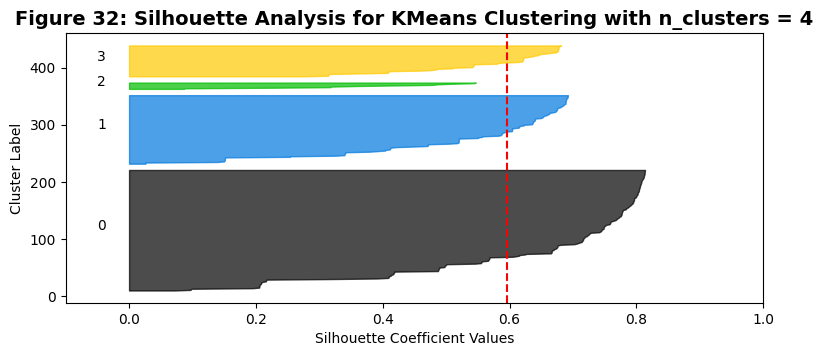

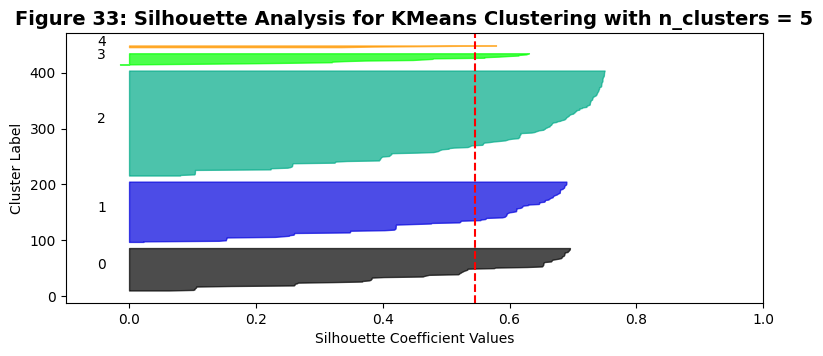

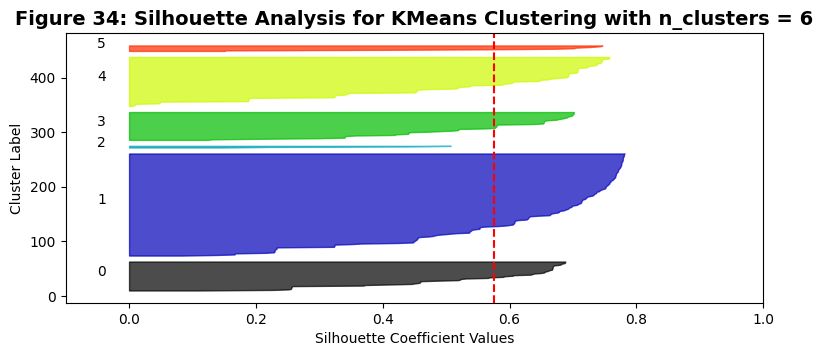

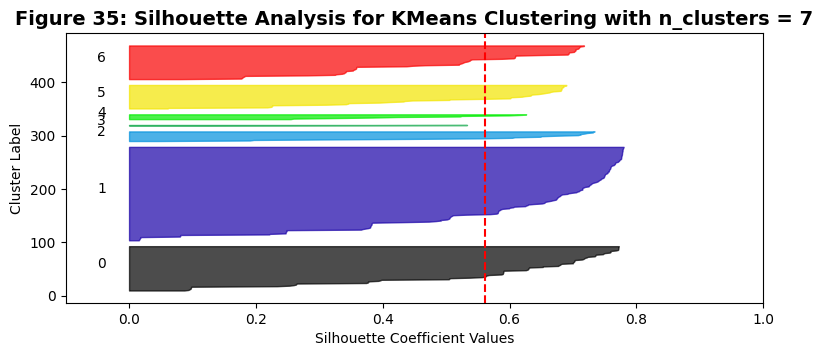

In [445]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

k_values = list(range(2,8))
silhouette_scores = []

for k in k_values:
    km = KMeans(n_clusters = k, n_init = 20, random_state=0)
    cluster_labels = km.fit_predict(X_filled)
    silhouette_avg_km = silhouette_score(X_filled, cluster_labels)

    silhouette_scores.append(silhouette_avg_km)

    sample_silhouette_values = silhouette_samples(X_filled, cluster_labels)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18/2, 7/2)
    ax1.set_xlim([-0.1, 1])

    y_lower = 10
    
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("Silhouette Coefficient Values")
    ax1.set_ylabel("Cluster Label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        f"Figure {28+k}: Silhouette Analysis for KMeans Clustering with n_clusters = {k}",
        fontsize=14,
        fontweight="bold",
    )
    plt.savefig(f'figures/fig{28+k}_KMeans-SilAna-{k}')


We also plot the silhouette scores.

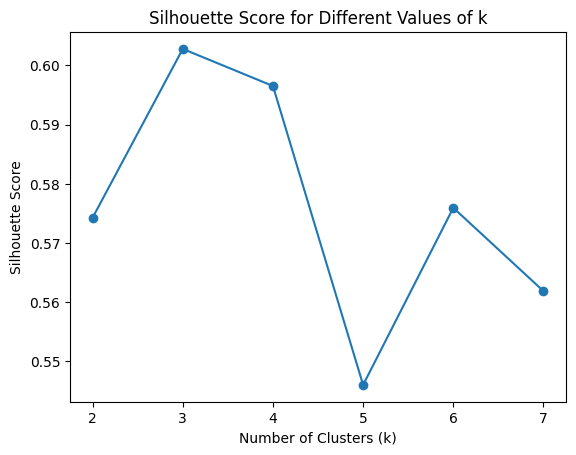

In [446]:
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.savefig(f'figures/fig36_KMeans-Silhouettes')
plt.show()

In [447]:
optimal_k = k_values[np.argmax(silhouette_scores)]
optimal_score = np.max(silhouette_scores)

print(f"The optimal value of k is {optimal_k} with a silhouette score of {optimal_score:.3f}")

The optimal value of k is 3 with a silhouette score of 0.603


By the silhouette analysis and the silhouette score, we suspect that $K=3$ might be the ideal number of clusters.

In [448]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(X_filled)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

print(explained_variance)
print(cumulative_explained_variance)

[9.98660140e-01 8.79780989e-04 3.73376694e-04 4.14457058e-05
 2.64706277e-05 1.23604058e-05]
[0.99866014 0.99953992 0.9999133  0.99995474 0.99998121 0.99999357]


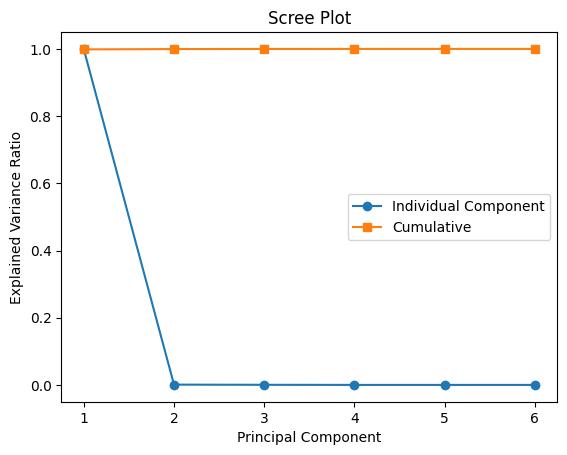

In [449]:
plt.plot(range(1, 6+1), explained_variance[:6], '-o', label = 'Individual Component')
plt.plot(range(1, 6+1), cumulative_explained_variance[:6], '-s', label = 'Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.show()

We have that a single principal compnonent is sufficient, however for visualization sake, we take two principal components.

In [450]:
print(f"Proportion of variance explained by the first two principal components: {cumulative_explained_variance[1]:.3f}")

Proportion of variance explained by the first two principal components: 1.000


In [451]:
# pca_loadings = pd.DataFrame(pca.components_.T, index=X.columns, columns=[f'PC{i}' for i in range(1, 25)])
# pca_loadings

In [452]:
km3 = KMeans(n_clusters=3, n_init=30, random_state=0)
km3.fit(X_filled)
pd.Series(km3.labels_).value_counts()

2    247
0    129
1     24
Name: count, dtype: int64

In [453]:
print(f"The inertia is {km3.inertia_:.3f}")

The inertia is 645511702.108


In [454]:
df2 = pd.DataFrame(pca.transform(X_filled), columns=X.columns[:6]) # note to self: check over this line of code
Xpcs = df2.iloc[:, :2]

In [455]:
centers_transformed = pca.transform(pd.DataFrame(km3.cluster_centers_))

In [456]:
centers_transformed.shape

(3, 6)

In [457]:
# np.zeros_like(Xpcs.iloc[:, 0])

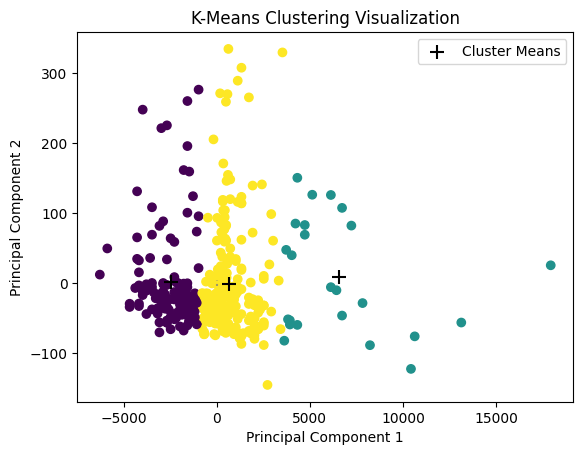

In [458]:
plt.scatter(Xpcs.iloc[:, 0], Xpcs.iloc[:, 1], c=km3.labels_)
plt.scatter(centers_transformed[:, 0], centers_transformed[:, 1], c='k', marker='+', s=100, label='Cluster Means') # Plot the means
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.hlines(0, -4, 4, linestyles = 'dotted', colors = 'grey', alpha = 0.75)
plt.vlines(0, -4, 4, linestyles = 'dotted', colors = 'grey', alpha = 0.75)

plt.title(f'K-Means Clustering Visualization')
plt.legend()
plt.savefig(f'figures/fig37_KMeansClustVis')
plt.show()

# Section 8: Data Splitting

**Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.**

Worked on by: Kyle

In [459]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_filled, # add X array
    y_r, # add y array
    test_size = 0.3, # train is 70%, test is 30% 
    random_state = 1, # random seed = 1
    # stratify = y, # Stratify?
)

# Section 9: Classifier Choices

**Identify the two classifiers you have chosen and justify your selections.**

Worked on by: Kyle

### KNN

In [460]:
from sklearn.neighbors import KNeighborsClassifier

y_pred_knn_all = []

for k in range(1, 30+1):

    knn__ = KNeighborsClassifier(
        n_neighbors = k,
        algorithm = 'auto',
    )

    knn__.fit(X_train, y_train.to_numpy().ravel())
    y_pred_knn_current = knn__.predict(X_test)

    y_pred_knn_all.append(y_pred_knn_current)

### Random Forest

In [461]:
from sklearn.ensemble import RandomForestClassifier

rf__ = RandomForestClassifier(
    n_estimators = 100,
    criterion = 'gini',
)

rf__.fit(X_train, y_train.to_numpy().ravel())
y_pred_rf = rf__.predict(X_test)

### Deep Learning Approach

In [462]:
X_train.shape

(280, 24)

In [463]:
# can we try using deep learning for one of the classifier choices?

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from sklearn.metrics import accuracy_score

'''
ideas: use only relevant features (check random forest)
- try relu plus dropout without choosing relevant features
'''

class Classifier(nn.Module):

    def __init__(self):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(24, 40)
        self.fc2 = nn.Linear(40, 18)
        self.fc3 = nn.Linear(18, 1)
        self.dropout = nn.Dropout(p=0.10)
    
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), negative_slope=0.000025)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), negative_slope=0.000025)
        return torch.sigmoid(self.fc3(x))

# Training loop

EPOCHS = 15000

model = Classifier()
criterion = nn.BCELoss()
# optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=0.00011, weight_decay=0.005)

training_loss_hist = []
validation_loss_hist = []
accuracy_history = []

print('Begin Training!')
for epoch in range(EPOCHS):
    try:

        # Use Cross-Validation with different train-test splits per epoch
        X_train_DL, X_test_DL, y_train_DL, y_test_DL = train_test_split(
            X_filled, # add X array
            y_r, # add y array
            train_size = 0.95,
            test_size = 0.05, # train is 70%, test is 30% 
            random_state = epoch, # random seed = 1
            # stratify = y, # Stratify?
        )
        X_train_torch = torch.tensor(X_train_DL, dtype=torch.float32)
        X_test_torch = torch.tensor(X_test_DL, dtype=torch.float32)
        y_train_torch = torch.tensor(y_train_DL.to_numpy().ravel(), dtype=torch.float32).flatten()
        y_test_torch = torch.tensor(y_test_DL.to_numpy().ravel(), dtype=torch.float32).flatten()

        ## TRAINING MODE
        model.train()

        optimizer.zero_grad()
        outputs = model(X_train_torch).flatten()
        loss = criterion(outputs, y_train_torch)
        loss.backward()

        # model suffers from exploding gradient problem. we clip the gradient at 0.9
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.95)
        optimizer.step()

        ## VALIDATION MODE
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_test_torch)
            val_loss = criterion(val_outputs.flatten(), y_test_torch.flatten())

        all_outputs = torch.hstack((val_outputs.flatten(), outputs))
        all_y_test = torch.hstack((y_test_torch, y_train_torch))

        accuracy = accuracy_score(all_outputs >= 0.5, all_y_test)

        if (epoch+1) % 20 == 0:
            print(f'Epoch {epoch+1}. Training Loss: {loss:.3f}. Validation Loss: {val_loss:.3f}. Accuracy: {accuracy:.3f}.')
        
        training_loss_hist.append(float(loss))
        validation_loss_hist.append(float(val_loss))
        accuracy_history.append(accuracy)

    except KeyboardInterrupt:
        print("Manual stop: Ended training early!")
        break

    if accuracy >= 0.95 and epoch > 2000:
        print(f'Epoch {epoch+1}. Training Loss: {loss:.3f}. Validation Loss: {val_loss:.3f}. Accuracy: {accuracy:.3f}.')
        print('Training complete! Early convergence.')
        break
    

Begin Training!
Epoch 20. Training Loss: 30.957. Validation Loss: 35.000. Accuracy: 0.570.
Epoch 40. Training Loss: 35.825. Validation Loss: 50.000. Accuracy: 0.588.
Epoch 60. Training Loss: 37.677. Validation Loss: 30.000. Accuracy: 0.615.
Epoch 80. Training Loss: 36.811. Validation Loss: 45.000. Accuracy: 0.618.
Epoch 100. Training Loss: 37.717. Validation Loss: 30.000. Accuracy: 0.615.
Epoch 120. Training Loss: 36.665. Validation Loss: 40.000. Accuracy: 0.625.
Epoch 140. Training Loss: 37.917. Validation Loss: 25.000. Accuracy: 0.620.
Epoch 160. Training Loss: 37.269. Validation Loss: 20.000. Accuracy: 0.625.
Epoch 180. Training Loss: 37.385. Validation Loss: 35.000. Accuracy: 0.625.
Epoch 200. Training Loss: 36.685. Validation Loss: 40.000. Accuracy: 0.625.
Epoch 220. Training Loss: 37.138. Validation Loss: 35.000. Accuracy: 0.625.
Epoch 240. Training Loss: 37.685. Validation Loss: 30.000. Accuracy: 0.623.
Epoch 260. Training Loss: 36.642. Validation Loss: 45.000. Accuracy: 0.625.


In [464]:
from pathlib import Path
import pickle

model_file_path = 'models/model1.pth'
counter = 1

while Path(model_file_path).is_file(): # ensure that no files are overwritten
    counter += 1
    model_file_path = f'models/model{counter}.pth'

torch.save(model, model_file_path)

with open(f'losses/train_loss_{counter}.pkl', 'wb') as handle:
    pickle.dump(training_loss_hist, handle)

with open(f'losses/valid_loss_{counter}.pkl', 'wb') as handle:
    pickle.dump(validation_loss_hist, handle)

with open(f'losses/accuracy_{counter}.pkl', 'wb') as handle:
    pickle.dump(accuracy_history, handle)

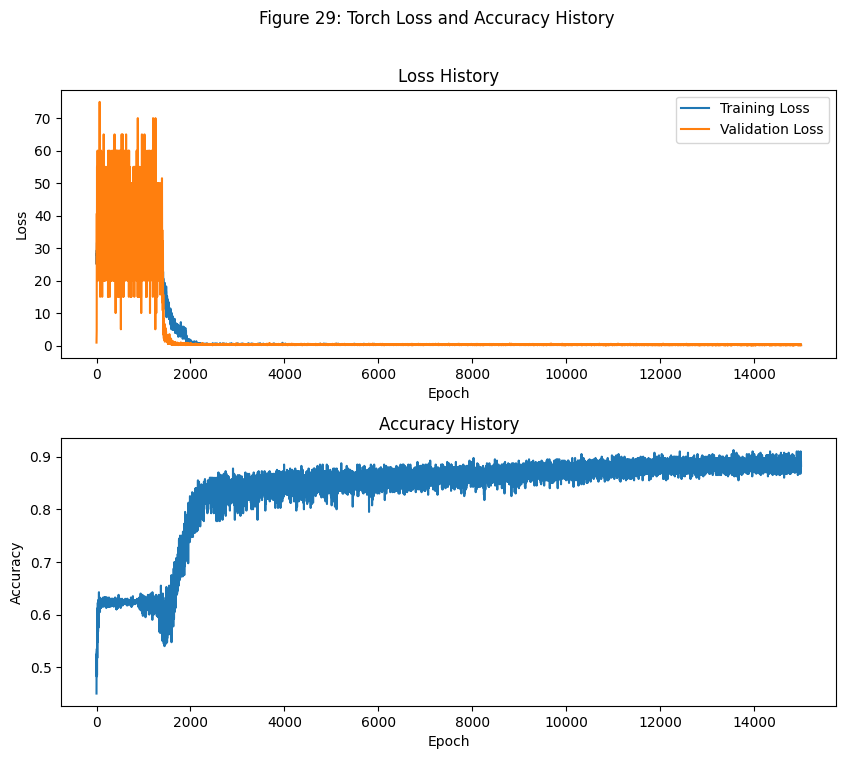

In [465]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.plot(training_loss_hist, label="Training Loss")
ax1.plot(validation_loss_hist, label="Validation Loss")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.set_title('Loss History')

ax2.plot(accuracy_history)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy History')

plt.suptitle('Figure 29: Torch Loss and Accuracy History')
plt.subplots_adjust(hspace=0.3)
plt.savefig('figures/fig29_torch-loss-acc')
plt.show()

In [466]:
model.eval()
with torch.no_grad():
    y_pred_dl = (model(torch.tensor(X_test, dtype=torch.float32)) >= 0.5).float()
y_pred_dl = y_pred_dl.detach().numpy()

print(1 - float((np.abs(y_pred_dl - y_test)).sum().iloc[0])/400)

0.965


# Section 10: Performance Metrics

**Outline the two metrics for comparing the performance of the classifiers.**

Worked on by: Kyle

In [467]:
from sklearn.metrics import accuracy_score

acc_knn_all = []

for k in range(1, 30+1):

    acc_knn_current = accuracy_score(
        y_test, # Add Y-actual
        y_pred_knn_all[k-1], # Add Y-prediction
    )
    acc_knn_all.append(acc_knn_current)

best_knn_k = np.argmax(acc_knn_all)
best_knn_acc = acc_knn_all[best_knn_k]

acc_rf = accuracy_score(
    y_test, # Add Y-actual
    y_pred_rf, # Add Y-prediction
)

acc_dl = accuracy_score(
    y_test,
    y_pred_dl,
)

print(f"Accuracy Score for Best KNN with k={best_knn_k+1}: {best_knn_acc:.4f}")
print(f"Accuracy Score for Random Forest with [note to self: add params]: {acc_rf:.4f}")
print(f"Accuracy Score for Deep Learning with [note to self: add params]: {acc_dl:.4f}")

Accuracy Score for Best KNN with k=7: 0.7750
Accuracy Score for Random Forest with [note to self: add params]: 0.9667
Accuracy Score for Deep Learning with [note to self: add params]: 0.8833


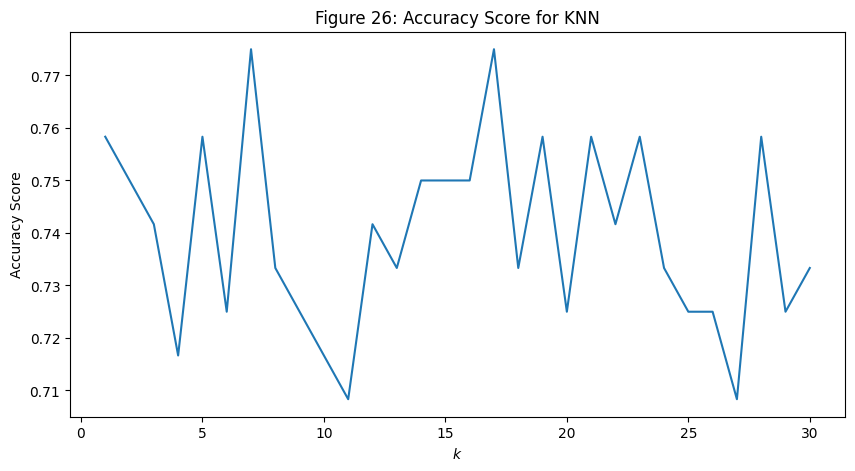

In [468]:
plt.figure(figsize=(10,5))
plt.plot(range(1,30+1), acc_knn_all)
plt.title('Figure 26: Accuracy Score for KNN')
plt.xlabel(r'$k$')
plt.ylabel('Accuracy Score')
plt.savefig('figures/fig26_knn_accuracies')
plt.show()

In [469]:
from sklearn.metrics import confusion_matrix

knn_specificities_all = []
knn_sensitivities_all = []

for k in range(1, 30+1):
    cm_current = confusion_matrix(
        y_pred_knn_all[k-1],
        y_test,
    )
    specificity_current = cm_current[0,0] / (cm_current[0,0]+cm_current[0,1])
    sensitivity_current = cm_current[1,1] / (cm_current[1,0]+cm_current[1,1])
    knn_specificities_all.append(specificity_current)
    knn_sensitivities_all.append(sensitivity_current)

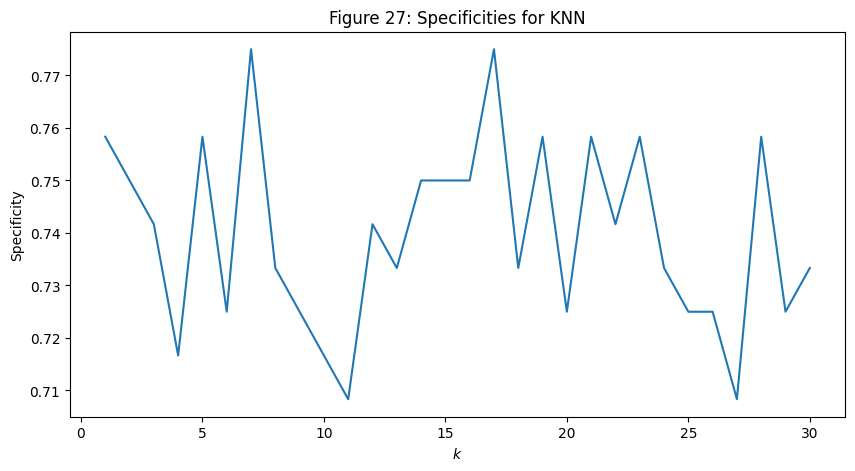

In [470]:
plt.figure(figsize=(10,5))
plt.plot(range(1,30+1), acc_knn_all)
plt.title('Figure 27: Specificities for KNN')
plt.xlabel(r'$k$')
plt.ylabel('Specificity')
plt.savefig('figures/fig27_knn_specificities')
plt.show()

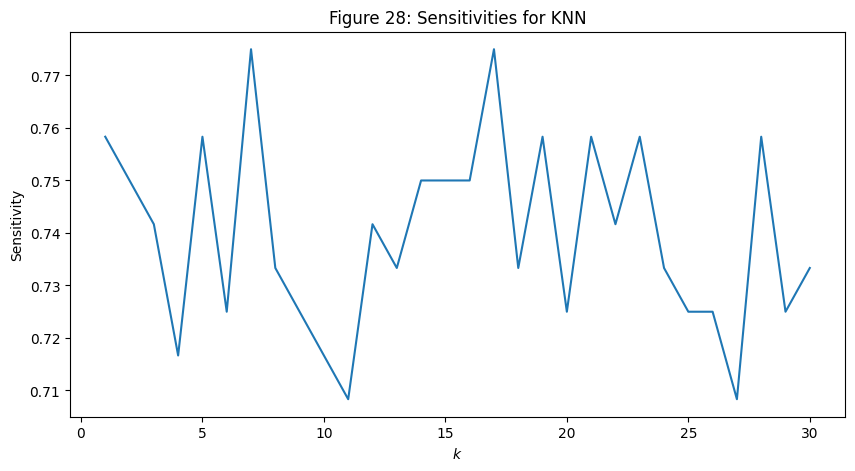

In [471]:
plt.figure(figsize=(10,5))
plt.plot(range(1,30+1), acc_knn_all)
plt.title('Figure 28: Sensitivities for KNN')
plt.xlabel(r'$k$')
plt.ylabel('Sensitivity')
plt.savefig('figures/fig28_knn_sensitivities')
plt.show()

In [472]:
cm_rf = confusion_matrix(y_pred_rf, y_test) ## REPLACE WITH CONFUSION MATRIX

total = np.sum(cm_rf)

accuracy = ( cm_rf[0,0] + cm_rf[1,1] ) / total
print (f'Accuracy : {accuracy:.4f}')

specificity = cm_rf[0,0] / ( cm_rf[0,0] + cm_rf[0,1] )
print(f'Specificity : {specificity:.4f}')

sensitivity = cm_rf[1,1] / ( cm_rf[1,0] + cm_rf[1,1] )
print(f'Sensitivity : {sensitivity:.4f}')

Accuracy : 0.9667
Specificity : 0.9600
Sensitivity : 0.9714


In [473]:
from sklearn.metrics import classification_report

cr_rf = classification_report(y_true = y_test, y_pred = y_pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        50
           1       0.97      0.97      0.97        70

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [474]:
cm_dl = confusion_matrix(y_pred_dl, y_test) ## REPLACE WITH CONFUSION MATRIX

total = np.sum(cm_dl)

accuracy = ( cm_dl[0,0] + cm_dl[1,1] ) / total
print (f'Accuracy : {accuracy:.4f}')

specificity = cm_dl[0,0] / ( cm_dl[0,0] + cm_dl[0,1] )
print(f'Specificity : {specificity:.4f}')

sensitivity = cm_dl[1,1] / ( cm_dl[1,0] + cm_dl[1,1] )
print(f'Sensitivity : {sensitivity:.4f}')

Accuracy : 0.8833
Specificity : 0.8214
Sensitivity : 0.9375


# Section 11: Feature Selection and Extraction

**Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).**

Worked on by: 

# Section 12: Classifier Comparison

**Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).**

Worked on by: 

# Section 13: Interpretable Classifier Insight

**After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).**

Worked on by: 

# [BONUS] Section 14: Subgroup Improvement Strategy

**If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).**

# Section 15: Team Contributions

**Document each team member's specific contributions related to the questions above.**



# Section 16: Link 

Link to the public GitHub repository.

[https://github.com/kyleosung/Stats_3DA3_A6](https://github.com/kyleosung/Stats_3DA3_A6)

\newpage

## Grading scheme 

\begin{table}[H]
\begin{tabular}{p{0.15\textwidth}  p{0.65\textwidth}}
1.   & Answer [1]\\
2.   & Codes [2] \\
     & OR answer [2]\\
3.   & Codes [3] and answer [3]\\
4.   & Codes [2] and answer [3]\\
5.   & Codes [2]\\
     & OR answer [2]\\
6.   & Codes [2] \\
     & OR answer [2]\\
7.   & Codes [3] and Plot [1]\\
8.   & Codes [1]\\
9.   & Answers [2]\\
10.   & Describe the two metrics [2]\\
11.   & Codes [2] \\
      & these codes can be included in (12)\\
12.   & Codes (two classifiers training,\\
     & model selection for each classifier, \\
     & classifiers comparisons) [5] and answer [2]\\
13.   & Codes [1] and answers [2]\\
14.   & Codes and comparison will \\
     & give \textbf{bonus 2 points for the final grade}.\\
\end{tabular}
\end{table}

**The maximum point for this assignment is 39. We will convert this to 100%.**

**All group members will receive the same grade if they contribute to the same.**
